In [10]:
# TODO: get all data again without error limits

In [11]:
#import library
from astropy.io import fits # --deals with fits file

file=fits.open('BPT0.001-0.1351.fits')
file.info()

Filename: BPT0.001-0.1351.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    182   499747R x 87C   [1K, 1E, 1D, 25A, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1D, 1D, 32A, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 25A]   


In [12]:
data=file[1].data # read the columns

data.columns

ColDefs(
    name = 'objID'; format = '1K'
    name = 'modelmag_r'; format = '1E'
    name = 'abs_mag_r'; format = '1D'
    name = 'specObjID'; format = '25A'
    name = 'petroMag_u'; format = '1E'
    name = 'petroMag_g'; format = '1E'
    name = 'petroMag_r'; format = '1E'
    name = 'petroMag_i'; format = '1E'
    name = 'petroMag_z'; format = '1E'
    name = 'petroMagErr_u'; format = '1E'
    name = 'petroMagErr_g'; format = '1E'
    name = 'petroMagErr_r'; format = '1E'
    name = 'petroMagErr_i'; format = '1E'
    name = 'petroMagErr_z'; format = '1E'
    name = 'z'; format = '1E'
    name = 'ra'; format = '1D'
    name = 'dec'; format = '1D'
    name = 'class'; format = '32A'
    name = 'h_alpha_eqw'; format = '1E'
    name = 'h_alpha_eqw_err'; format = '1E'
    name = 'h_alpha_flux'; format = '1E'
    name = 'h_alpha_flux_err'; format = '1E'
    name = 'h_beta_eqw'; format = '1E'
    name = 'h_beta_eqw_err'; format = '1E'
    name = 'h_beta_flux'; format = '1E'
    name = 'h_be

In [13]:
# Find the largest z included

from astropy.table import Table

with fits.open('BPT0.001-0.1351.fits') as hdul:
    # Assuming the data is in the first HDU (or change the index accordingly)
    data = hdul[1].data  # If the data is in the second HDU
    
    # If the data is in a table (e.g., in the second HDU), access the 'z' column
    table = Table(data)
    
    # Find the maximum value of the 'z' column
    max_z_value = table['z'].max()

# Output the result
print(f"The highest z value is: {max_z_value}")

The highest z value is: 0.13509930670261383


In [14]:
# extract columns
halpha=data['h_alpha_flux']
halpha_err=data['h_alpha_flux_err']
hbeta=data['h_beta_flux']
hbeta_err=data['h_beta_flux_err']
oiii=data['oiii_5007_flux']
oiii_err=data['oiii_5007_flux_err']
nii=data['nii_6584_flux']
nii_err=data['nii_6584_flux_err']

# Take only flux > 0, SNR=flux/flux_err > 3, (NII/Hbeta & OIII/Halpha) > 0

In [15]:
import numpy as np # array

ha_new=[]
hb_new=[]
oiii_new=[]
nii_new=[]

for i in range(len(halpha)):
    if( (halpha[i]>0) & (hbeta[i]>0) & (oiii[i]>0) & (nii[i]>0) & (halpha[i]/halpha_err[i]>3) & (hbeta[i]/hbeta_err[i]>3) & (oiii[i]/oiii_err[i]>3) & (nii[i]/nii_err[i]>3) & (nii[i]/hbeta[i]>0) & (oiii[i]/halpha[i]>0)):
        ha_new.append(halpha[i])
        hb_new.append(hbeta[i])
        oiii_new.append(oiii[i])
        nii_new.append(nii[i])

C:\Users\chloe\AppData\Local\Temp\ipykernel_26084\508055923.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  if( (halpha[i]>0) & (hbeta[i]>0) & (oiii[i]>0) & (nii[i]>0) & (halpha[i]/halpha_err[i]>3) & (hbeta[i]/hbeta_err[i]>3) & (oiii[i]/oiii_err[i]>3) & (nii[i]/nii_err[i]>3) & (nii[i]/hbeta[i]>0) & (oiii[i]/halpha[i]>0)):
C:\Users\chloe\AppData\Local\Temp\ipykernel_26084\508055923.py:9: RuntimeWarning: invalid value encountered in scalar divide
  if( (halpha[i]>0) & (hbeta[i]>0) & (oiii[i]>0) & (nii[i]>0) & (halpha[i]/halpha_err[i]>3) & (hbeta[i]/hbeta_err[i]>3) & (oiii[i]/oiii_err[i]>3) & (nii[i]/nii_err[i]>3) & (nii[i]/hbeta[i]>0) & (oiii[i]/halpha[i]>0)):


In [16]:
len(ha_new), len(halpha)

(291333, 499747)

# PLOT BPT Diagram

# 0.61/[log([NII]/Hα) - 0.47] + 1.19 < log([OIII]/Hβ)

# 0.61/[log([NII]/Hα) - 0.05] + 1.3 < log([OIII]/Hβ)

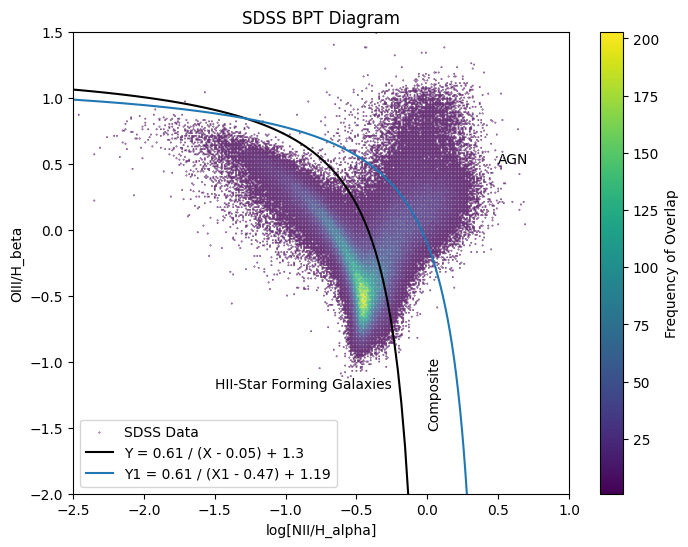

In [17]:
import matplotlib.pyplot as plt # used to visualize data
from collections import Counter

# extract data for plotting
Hor=np.array(nii_new)/np.array(ha_new)
Ver=np.array(oiii_new)/np.array(hb_new)
log_Hor = np.log10(Hor)
log_Ver = np.log10(Ver)

# Round data to reduce floating-point differences (adjust precision as needed)
# so that the graph can be a true density graph
rounded_Hor = np.round(log_Hor, decimals=2)
rounded_Ver = np.round(log_Ver, decimals=2)

# count occurrences of each point
points = list(zip(rounded_Hor, rounded_Ver))
counts = Counter(points)

# extract points and their counts
unique_points = np.array(list(counts.keys()))
x_unique = unique_points[:, 0]
y_unique = unique_points[:, 1]
densities = np.array(list(counts.values()))

# create scatter plot
plt.figure(figsize=(8, 6)) # makes plot bigger
scatter = plt.scatter(x_unique, y_unique, s=0.1, c=densities, cmap='viridis', label='SDSS Data')
plt.colorbar(scatter, label='Frequency of Overlap') # use a color bar to show density

# plot additional curves
X = np.linspace(-2.5,0.049,100)
Y = 0.61 / (X - 0.05) + 1.3
plt.plot(X,Y,c='k',label='Y = 0.61 / (X - 0.05) + 1.3')

X1 = np.linspace(-2.5,0.46,1900)
Y1 = 0.61 / (X1 - 0.47) + 1.19
plt.plot(X1,Y1,label='Y1 = 0.61 / (X1 - 0.47) + 1.19')

# add text annotations
plt.text(-1.5,-1.2,'HII-Star Forming Galaxies')
plt.text(0,-1.5,'Composite', rotation=90)
plt.text(0.5,0.5,'AGN')

# set plot titles and labels
plt.title('SDSS BPT Diagram')
plt.xlabel('log[NII/H_alpha]')
plt.ylabel('OIII/H_beta')
plt.legend()
plt.xlim(-2.5,1)
plt.ylim(-2,1.5)

plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# extract data for plotting
Hor = np.array(nii_new) / np.array(ha_new)
Ver = np.array(oiii_new) / np.array(hb_new)
log_Hor = np.log10(Hor)
log_Ver = np.log10(Ver)

# Round data to reduce floating-point differences (adjust precision as needed)
rounded_Hor = np.round(log_Hor, decimals=2)
rounded_Ver = np.round(log_Ver, decimals=2)

# Define the lines for BPT diagram
def NII_empirical_relation(x):
    return 0.61 / (x - 0.05) + 1.3

def NII_dividing_line(x1):
    return 0.61 / (x1 - 0.47) + 1.19

# Categorize galaxies based on BPT diagram
AGN_count = 0
HII_count = 0
composite_count = 0

for x, y in zip(rounded_Hor, rounded_Ver):
    if y > NII_empirical_relation(x):  # AGN
        AGN_count += 1
    elif y < NII_dividing_line(x):  # HII Star-forming
        HII_count += 1
    else:  # Composite region
        composite_count += 1

print(f"Number of AGN galaxies: {AGN_count}")
print(f"Number of HII Star-forming galaxies: {HII_count}")
print(f"Number of Composite galaxies: {composite_count}")


NameError: name 'nii_new' is not defined